In [2]:
import pandas as pd
import crowdtruth
import csv

from crowdtruth.configuration import DefaultConfig
import dateparser


df = pd.read_csv("data/Answers_general.csv")


ModuleNotFoundError: No module named 'pandas'

In [25]:
print(df.head())


   judgmentId  unitId  workerId           startedAt         submittedAt  \
0         100     100         1  31-3-2023 13:00:32  31-3-2023 13:00:32   
1         101     100         2  31-3-2023 13:27:12  31-3-2023 13:27:12   
2         102     100         3  31-3-2023 13:30:01  31-3-2023 13:30:01   
3         103     100         4  31-3-2023 13:38:18  31-3-2023 13:38:18   
4         104     100         5  31-3-2023 13:42:55  31-3-2023 13:42:55   

  Answer                                  Link  
0      4   https://forms.gle/THgNSrpyhWR8Hthi8  
1      4   https://forms.gle/THgNSrpyhWR8Hthi9  
2      4  https://forms.gle/THgNSrpyhWR8Hthi10  
3      4  https://forms.gle/THgNSrpyhWR8Hthi11  
4      4  https://forms.gle/THgNSrpyhWR8Hthi12  


In [26]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

In [1]:
class TestConfig(DefaultConfig):
    inputColumns = ["Link"]
    outputColumns = ["Answer"]
    customPlatformColumns = ["judgmentId", "unitId", "workerId", "startedAt", "submittedAt"]
    
    # processing of a closed task
    open_ended_task = True
    annotation_vector = ["1", "2", "3", "4", "5", "revolt", "strike", "protest", "insurrection", "justice", "anger", "violence", "desperation"]
    annotation_separator = "/ "
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

NameError: name 'DefaultConfig' is not defined

In [38]:
data, config = crowdtruth.load(
    file = "data/Answers_general.csv",
    config = TestConfig()
)

data['judgments'].to_csv("data/results_general/result_units.csv")
# with open('data/results/judgments.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x


In [39]:
results = crowdtruth.run(data, config)

In [41]:
results["units"].head()
results["units"].to_csv("data/results_general/result_judgments.csv")

Text(0, 0.5, 'Sentences')

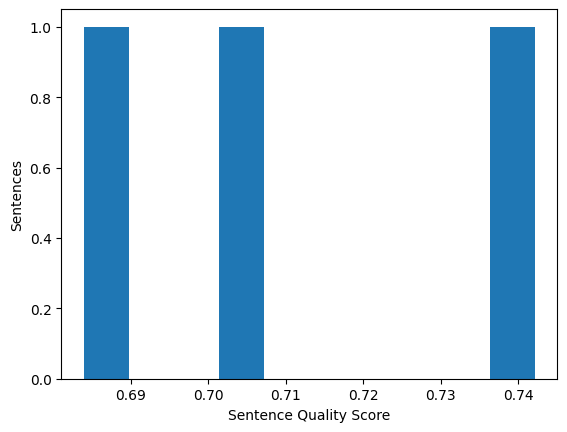

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

results["units"]["uqs"].to_csv("data/results_general/unit_quality_score.csv")
plt.hist(results["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")

In [43]:
results["units"]["unit_annotation_score"]
results["units"]["unit_annotation_score"].to_csv("data/results_general/unit_annotation_score.csv")


In [44]:
results["workers"].to_csv("data/results_general/workers.csv")
results["workers"]


,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
1,3,3,1,0.0,0.235521,0.444104,0.530327,0.248532,0.412865,0.601969
2,3,3,1,0.0,0.776100,0.808603,0.959804,0.623077,0.672781,0.926123
3,3,3,1,0.0,0.717018,0.778359,0.921191,0.543984,0.635341,0.856209
4,3,3,1,0.0,0.665457,0.753398,0.883273,0.457064,0.587543,0.777924
5,3,3,1,0.0,0.515798,0.659550,0.782045,0.418960,0.544595,0.769305
6,3,3,1,0.0,0.326386,0.536826,0.607991,0.266971,0.455168,0.586533
7,3,3,1,0.0,0.168495,0.391011,0.430920,0.129136,0.310505,0.415890
8,3,3,1,0.0,0.726371,0.782812,0.927900,0.517338,0.623464,0.829781
9,3,3,1,0.0,0.789559,0.813894,0.970101,0.598702,0.664509,0.900968


Text(0, 0.5, 'Workers')

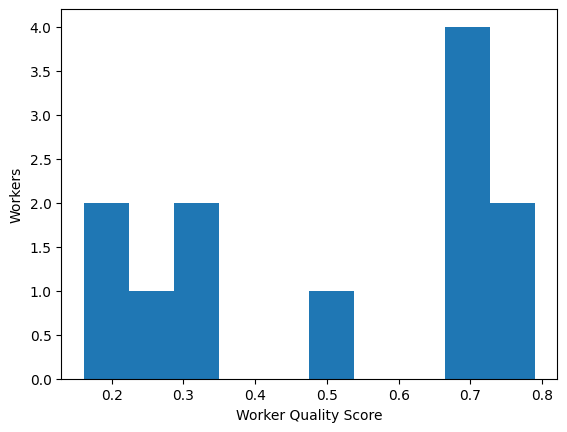

In [45]:
plt.hist(results["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

In [20]:
results["annotations"]
results["annotations"].to_csv("data/results_general/annotation_score.csv")